# RandomForestRegressor
Taken directly from the following:
Regression Example with RandomForestRegressor in Python
https://www.datatechnotes.com/2020/09/regression-example-with-randomforestregressor.html

Training Data Score: 0.9665225014936368

Testing Data Score: 0.9478942257910268

In [1]:
#    Dependencies

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn import set_config 

In [2]:
# import processed data
path = "Trends/"
file = "finalFeatures.csv"
path_file = path + file
df = pd.read_csv(path_file)
df.head()

,Year,Brent ave closing USD,Coffe Export (In 1K 60-kg bags) crop year,Coffe Imports (In 1K 60-kg bags) Calendar Year 137c,Coffe Produciton (In 1K 60-kg bags) crop year,Domestic Consumption (In 1K 60-kg bags),ICO composite (USD $/lb),Inventories (In 1K 60-kg bags),re-exports (In 1K 60-kg bags) Calendar Year 35c,WTI ave closing price USD,retail
0,1990,23.76,73887,100082,93230,19509,0.72,15619,8769,24.53,4.53
1,1991,20.04,79768,97310,101269,20228,0.67,13200,9770,21.54,4.48
2,1992,19.32,76957,103653,98523,20951,0.53,16843,10691,20.58,4.53
3,1993,17.01,74130,101530,91762,21098,0.62,14218,11041,18.43,4.03
4,1994,15.86,65962,100811,93314,21360,1.34,12667,12833,17.20,4.59


In [3]:
df.shape

(29, 11)

In [4]:
# Create dataframe for running decision tree
# This was done to upload existing code with similar variables
# Main Data set: data_df

x = df.drop("retail", axis=1)
y= df["retail"]
#target

xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.10)

In [17]:
ytest

2     4.53
4     4.59
25    6.02
Name: retail, dtype: float64

In [5]:
set_config(print_changed_only=False) 
 
rfr = RandomForestRegressor()
#print(rfr)
 
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [6]:
rfr.fit(xtrain, ytrain)

score = rfr.score(xtrain, ytrain)
print("R-squared:", score) 
 


R-squared: 0.9708704820049541


In [7]:
ypred = rfr.predict(xtest)

mse = mean_squared_error(ytest, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 

MSE:  0.130713987032462
RMSE:  0.065356993516231 

MSE:  0.535300016666668
RMSE:  0.267650008333334


In [8]:
rfr.score(xtest, ytest)

-0.1286370589888992

In [9]:
print(f"Training Data Score: {rfr.score(xtrain, ytrain)}")
print(f"Testing Data Score: {rfr.score(xtest, ytest)}")

Training Data Score: 0.9708704820049541
Testing Data Score: -0.1286370589888992


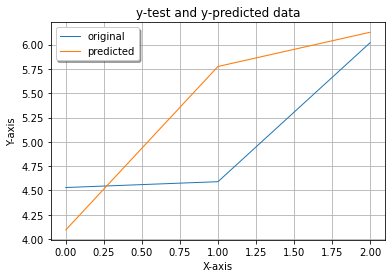

In [11]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, linewidth=1, label="original")
plt.plot(x_ax, ypred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [12]:
ytest

2     4.53
4     4.59
25    6.02
Name: retail, dtype: float64

In [13]:
ypred

array([4.0939, 5.775 , 6.1272])